In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor

In [2]:
# Load dataset

Train = pd.read_csv('train.csv')
Train

,id,Col 1,Col 2,Col 3,Col 4,Col 5,Col 6,Col 7,Col 8,Col 9,...,Col 56,Col 57,Col 58,Col 59,Col 60,Col 61,Col 62,Col 63,Col 64,y
0,0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,...,-0.022038,-0.031125,-0.000922,0.033494,0.000852,0.031150,-0.028191,-0.017658,-0.027794,151
1,1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,...,-0.011564,0.012973,0.023783,-0.023815,-0.094506,-0.140378,0.025298,0.053034,0.104013,75
2,2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,...,-0.022063,-0.018016,0.004913,0.032956,0.018281,0.032795,-0.027332,-0.017236,-0.022304,141
3,3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,...,-0.009984,-0.003373,-0.019109,0.008159,0.001898,0.021514,-0.012045,-0.024872,-0.025042,206
4,4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,...,-0.024091,-0.026846,-0.029687,0.030984,0.014489,0.005386,-0.025575,-0.016180,0.008735,135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,155,-0.027310,0.050680,0.060618,0.049415,0.085116,0.086368,-0.002903,0.034309,0.037814,...,0.023104,0.056056,0.075937,0.029510,0.017894,0.010752,-0.001955,0.014242,0.015606,186
156,156,-0.016412,-0.044642,-0.010517,0.001215,-0.037344,-0.035760,0.011824,-0.039493,-0.021394,...,-0.001265,0.000986,0.012134,0.022610,0.014659,0.004828,-0.010755,0.008008,-0.006328,25
157,157,-0.001882,0.050680,-0.033151,-0.018294,0.031454,0.042840,-0.013948,0.019917,0.010226,...,-0.010049,-0.006214,0.011544,0.026163,0.017152,0.005169,-0.023226,-0.007626,-0.015175,84
158,158,-0.012780,-0.044642,-0.065486,-0.069938,0.001183,0.016849,-0.002903,-0.007020,-0.030751,...,-0.025315,-0.027269,-0.032436,0.031763,0.022391,0.017242,-0.022989,-0.011548,0.010113,96


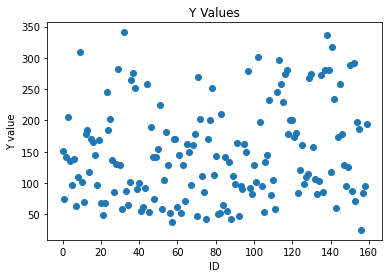

In [4]:
# Visualize y

plt.scatter(data=Train, x = 'id', y= 'y')
plt.title('Y Values')
plt.xlabel('ID')
plt.ylabel('Y value')
plt.show()

In [5]:
# Descriptive statistics

Train.describe()

,id,Col 1,Col 2,Col 3,Col 4,Col 5,Col 6,Col 7,Col 8,Col 9,...,Col 56,Col 57,Col 58,Col 59,Col 60,Col 61,Col 62,Col 63,Col 64,y
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,...,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,79.500000,-0.008875,-0.002343,-0.001120,-0.004401,-0.006032,-0.004778,0.002827,-0.005934,-0.006234,...,-0.000659,-0.005031,-0.000871,-0.001619,0.002133,-0.002643,-0.005465,0.001668,-0.001809,147.843750
std,46.332134,0.048101,0.047507,0.046042,0.045894,0.043050,0.045374,0.048762,0.047204,0.044045,...,0.055793,0.043475,0.049456,0.047331,0.045093,0.056129,0.039382,0.053606,0.047778,76.364695
min,0.000000,-0.107226,-0.044642,-0.083808,-0.108957,-0.126781,-0.106845,-0.102307,-0.076395,-0.126097,...,-0.076433,-0.155145,-0.151734,-0.228580,-0.143972,-0.223255,-0.160745,-0.128919,-0.092165,25.000000
25%,39.750000,-0.046381,-0.044642,-0.035307,-0.036656,-0.037344,-0.034273,-0.032356,-0.039493,-0.034524,...,-0.023703,-0.022007,-0.020446,-0.021084,-0.018638,-0.017585,-0.026875,-0.019626,-0.023964,87.750000
50%,79.500000,-0.001882,-0.044642,-0.006206,-0.012556,-0.005009,-0.009925,-0.002903,-0.002592,-0.010412,...,-0.014868,-0.009495,-0.010498,0.014418,0.009642,0.009252,-0.014899,-0.015336,-0.015265,134.500000
75%,119.250000,0.030811,0.050680,0.028284,0.021872,0.020446,0.021703,0.037595,0.025822,0.026221,...,0.003447,0.013173,0.009096,0.031522,0.022619,0.022176,0.014464,0.018200,0.011668,195.500000
max,159.000000,0.085299,0.050680,0.128521,0.125158,0.152538,0.198788,0.181179,0.185234,0.133599,...,0.555129,0.113164,0.299032,0.080445,0.163067,0.209905,0.157844,0.318104,0.338184,341.000000


In [13]:
Train.nunique().sort_values()

Col 2       2
Col 17     24
Col 8      24
Col 34     29
Col 19     48
         ... 
Col 50    160
Col 45    160
Col 42    160
Col 53    160
id        160
Length: 66, dtype: int64

In [3]:
Test = pd.read_csv('x_test.csv')
Test

,id,Col 1,Col 2,Col 3,Col 4,Col 5,Col 6,Col 7,Col 8,Col 9,...,Col 55,Col 56,Col 57,Col 58,Col 59,Col 60,Col 61,Col 62,Col 63,Col 64
0,160,-0.009147,-0.044642,-0.062252,-0.074528,-0.023584,-0.013214,0.004460,-0.039493,-0.035817,...,0.008349,-0.015256,-0.005439,-0.000883,0.028072,0.016765,0.009247,0.000324,0.017656,0.012271
1,161,-0.045472,0.050680,0.063852,0.070073,0.133274,0.131461,-0.039719,0.108111,0.075738,...,-0.103457,0.199861,0.203381,0.227999,-0.049270,-0.047594,-0.062812,0.132064,0.164034,0.108097
2,162,-0.052738,-0.044642,0.030440,-0.074528,-0.023584,-0.011335,-0.002903,-0.002592,-0.030751,...,0.010338,-0.022994,-0.008185,-0.013832,0.031522,0.022391,0.013997,-0.025637,-0.018503,-0.020176
3,163,0.016281,0.050680,0.072474,0.076958,-0.008449,0.005575,-0.006584,-0.002592,-0.023645,...,0.008831,-0.023683,-0.018763,-0.006797,0.031701,0.023892,0.004885,-0.025995,-0.021669,-0.049438
4,164,0.045341,-0.044642,-0.019140,0.021872,0.027326,-0.013527,0.100183,-0.039493,0.017763,...,-0.019722,-0.015062,-0.021151,-0.010178,-0.042931,0.060583,-0.016500,-0.040832,-0.008072,-0.025586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,237,0.056239,-0.044642,-0.068719,-0.068790,-0.000193,-0.001001,0.044958,-0.037648,-0.048362,...,0.008651,-0.022864,-0.014794,-0.014071,-0.000410,-0.028751,0.012837,0.008225,-0.017760,-0.019799
78,238,0.034443,0.050680,-0.009439,0.059744,-0.035968,-0.007577,-0.076536,0.071210,0.011008,...,0.022185,-0.031934,-0.017696,-0.010555,-0.070982,0.001339,0.051430,-0.011941,-0.049061,-0.025585
79,239,0.023546,-0.044642,0.019662,-0.012556,0.083740,0.038769,0.063367,-0.002592,0.066048,...,0.062830,-0.025035,0.040525,0.026320,0.028295,0.114936,0.083226,-0.030517,-0.021036,0.042812
80,240,0.048974,0.050680,0.074630,0.066630,-0.009825,-0.002253,-0.043401,0.034309,0.033657,...,0.011744,-0.024671,-0.017530,-0.015042,0.003414,-0.012630,-0.005237,-0.004729,-0.005315,-0.007738


In [16]:
# Correlation of columns with y

correlation_matrix = Train.corrwith(Train['y'])

# The correlation_matrix will contain the correlation coefficients between 'y' and all other variables
print(correlation_matrix)

id        0.158143
Col 1     0.124903
Col 2     0.000346
Col 3     0.546352
Col 4     0.407114
            ...   
Col 61   -0.098437
Col 62   -0.035484
Col 63    0.125056
Col 64    0.080796
y         1.000000
Length: 66, dtype: float64


In [17]:
correlation_matrix.sort_values(ascending=False)[:32]

y         1.000000
Col 9     0.577071
Col 3     0.546352
Col 4     0.407114
Col 8     0.365385
Col 10    0.345075
Col 12    0.267656
Col 13    0.160636
id        0.158143
Col 37    0.145018
Col 43    0.131930
Col 19    0.127436
Col 63    0.125056
Col 1     0.124903
Col 33    0.118725
Col 5     0.109329
Col 55    0.097764
Col 49    0.083715
Col 51    0.083005
Col 64    0.080796
Col 6     0.067999
Col 17    0.067727
Col 30    0.060196
Col 48    0.040459
Col 25    0.034211
Col 41    0.033945
Col 60    0.030321
Col 46    0.011834
Col 29    0.001562
Col 18    0.000868
Col 2     0.000346
Col 35   -0.002457
dtype: float64

In [21]:
correlation_matrix.sort_values(ascending=False)[32:]

Col 22   -0.004430
Col 20   -0.004727
Col 42   -0.016231
Col 54   -0.017739
Col 16   -0.023314
Col 11   -0.024760
Col 31   -0.033713
Col 62   -0.035484
Col 58   -0.038497
Col 28   -0.042235
Col 14   -0.043994
Col 59   -0.049748
Col 15   -0.050820
Col 34   -0.060424
Col 27   -0.063698
Col 56   -0.065586
Col 50   -0.065779
Col 47   -0.069148
Col 52   -0.080354
Col 21   -0.084734
Col 53   -0.088771
Col 36   -0.091132
Col 32   -0.095240
Col 61   -0.098437
Col 40   -0.119301
Col 26   -0.119709
Col 44   -0.132791
Col 45   -0.171991
Col 57   -0.179466
Col 23   -0.183141
Col 39   -0.187627
Col 38   -0.212799
Col 24   -0.216917
Col 7    -0.371558
dtype: float64

In [25]:
sc1 = StandardScaler()

Train1 = Train.copy()

Train1 = sc1.fit_transform(Train1)

Train1 = pd.DataFrame(Train1)
Train1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65
0,-1.721259,0.979154,1.119608,1.368607,0.574284,-0.889929,-0.664196,-0.951008,0.071018,0.595400,-0.262270,-0.351264,0.610649,-0.595255,0.026078,-0.222071,-0.131394,-0.611543,-0.586564,-0.578683,0.524104,0.770315,0.027141,-1.037782,-0.807640,-0.743267,-0.262184,0.011344,-0.593170,1.320673,0.264186,-1.295416,-1.157011,-0.608539,-0.554979,0.253310,-0.730855,0.205667,-1.580615,-1.319918,-0.873703,-0.506522,0.144610,-0.830229,-0.820272,-0.622853,-0.303465,-0.303015,-0.234187,-0.513534,-0.066308,0.874199,-0.298604,-0.891043,0.082015,0.910503,-0.384391,-0.602067,-0.001035,0.744189,-0.028493,0.603965,-0.578879,-0.361646,-0.545574,0.041461
1,-1.699608,0.145832,-0.893170,-1.097087,-0.479275,-0.056309,-0.318035,1.472666,-0.713171,-1.414235,-1.794395,-0.898572,0.194749,-0.517022,-0.606900,-0.441290,0.853926,-0.188085,1.009317,1.699329,-0.336485,-0.204685,-0.350796,-0.286778,-0.210513,-0.017983,-0.183934,-0.271074,-0.201832,0.931129,0.296152,-0.011831,0.099395,-1.141433,0.374932,1.247687,1.565290,0.208260,-0.028633,0.202842,-1.422685,0.517018,1.307394,1.775446,-0.207308,-0.006753,-0.800594,0.222057,0.507484,0.670310,-0.490115,-0.399214,-0.225058,-0.121347,0.081324,-0.416689,-0.196079,0.415438,0.500077,-0.470420,-2.149835,-2.461611,0.783609,0.961210,2.221802,-0.956888
2,-1.677957,1.963990,1.119608,0.992882,-0.027750,-0.921991,-0.650350,-0.723788,0.071018,0.207206,-0.432506,1.853558,-0.047443,-0.757817,0.067595,-0.233281,-0.357056,-0.611543,-0.731541,-0.478276,1.640020,1.394771,-0.608097,-2.012345,-1.505181,-1.274300,-0.317544,-0.219171,-1.305994,0.909937,-0.403551,-1.329600,-1.141791,-0.342752,-0.554979,-0.167465,-0.923258,-0.515318,-1.236460,-1.014696,-0.283373,-0.485656,-0.414689,-0.858781,-0.188688,-0.157903,0.254186,-0.268824,-0.479873,-0.289261,-0.060356,0.652341,-0.297406,-0.495120,0.285430,0.727568,-0.384849,-0.299607,0.117330,0.732792,0.359227,0.633364,-0.556989,-0.353745,-0.430309,-0.089901
3,-1.656306,-1.672327,-0.893170,-0.228223,-0.705038,0.424625,0.658138,-0.799528,0.855207,0.658797,-0.092034,2.101927,-0.709472,-0.280038,-0.580957,-0.374559,-0.289147,-0.292417,-0.542271,-0.640914,1.478203,0.200426,1.200587,-0.773513,-1.202204,1.588284,-1.599413,-1.235579,0.103802,0.094472,0.516718,-0.463500,-0.845763,1.199758,-1.242304,-0.731607,-0.129493,-0.210494,-0.311348,-0.417091,0.600695,-0.617556,-0.613019,-0.295568,-0.552146,-0.698010,0.814188,-0.878114,-0.923489,-0.206733,-0.446214,-0.304576,-0.196659,-0.280105,-0.370569,-0.179298,-0.167665,0.038271,-0.369933,0.207232,-0.005233,0.431742,-0.167610,-0.496642,-0.487800,0.763950
4,-1.634655,0.297345,-0.893170,-0.768328,0.574284,0.232251,0.450442,0.109349,0.071018,-0.586626,-0.858096,-0.888946,-0.281868,-0.595255,-0.625677,-0.473448,-0.621524,-0.611543,-0.352330,-0.060237,-0.487709,-0.331409,-0.317893,-0.284445,-0.189516,0.070190,-0.223858,-0.406044,-0.398375,0.614556,-0.733157,-0.282833,-0.644666,0.263282,-0.433686,0.457501,0.633159,-0.760111,-0.312240,-0.551987,0.260568,-0.387845,0.111958,0.413797,-0.277570,-0.086266,0.251532,-0.303015,-0.851646,-0.780382,-0.521036,-0.069008,-0.340522,-0.492636,-0.405682,0.285019,-0.421313,-0.503356,-0.584494,0.691003,0.274877,0.143495,-0.512226,-0.333994,0.221374,-0.168718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,1.634655,-0.384465,1.119608,1.345124,1.176318,2.123926,2.015089,-0.117870,0.855207,1.003213,1.099619,-0.617665,0.563253,0.120017,1.802745,1.398085,-0.637130,-0.292417,-0.200503,-0.007593,-1.021011,-0.963273,-1.025874,-1.320842,-1.260495,0.087188,-0.641275,-0.792136,-0.896881,1.295002,0.931923,1.917911,1.788049,0.366015,0.363017,0.695

In [27]:
# Correlation of columns with y

correlation_matrix1 = Train1.corrwith(Train1.iloc[:, -1])

# The correlation_matrix will contain the correlation coefficients between 'y' and all other variables
print(correlation_matrix1)

0     0.158143
1     0.124903
2     0.000346
3     0.546352
4     0.407114
        ...   
61   -0.098437
62   -0.035484
63    0.125056
64    0.080796
65    1.000000
Length: 66, dtype: float64


In [36]:
correlation_matrix1.sort_values(ascending=False)[:32]

65    1.000000
9     0.577071
3     0.546352
4     0.407114
8     0.365385
10    0.345075
12    0.267656
13    0.160636
0     0.158143
37    0.145018
43    0.131930
19    0.127436
63    0.125056
1     0.124903
33    0.118725
5     0.109329
55    0.097764
49    0.083715
51    0.083005
64    0.080796
6     0.067999
17    0.067727
30    0.060196
48    0.040459
25    0.034211
41    0.033945
60    0.030321
46    0.011834
29    0.001562
18    0.000868
2     0.000346
35   -0.002457
dtype: float64

Scaling doesn't change correlations to output variables

In [4]:
# Create X and y

X = Train[['Col 3', 'Col 9']]
y = Train['y']

In [5]:
import statsmodels.api as sm

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Get a summary of the regression results
summary = model.summary()

# Print the summary
print(summary)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.644
Model:                            OLS   Adj. R-squared (uncentered):              0.406
Method:                 Least Squares   F-statistic:                              2.709
Date:                Mon, 25 Sep 2023   Prob (F-statistic):                    4.81e-06
Time:                        20:32:25   Log-Likelihood:                         -962.68
No. Observations:                 160   AIC:                                      2053.
Df Residuals:                      96   BIC:                                      2250.
Df Model:                          64                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [7]:
# Only keep variables whos p value is below a certain threshold

selected_features = []

for feature in Train.columns:
    if feature != 'y':  # Skip the target variable
        X = sm.add_constant(Train[feature])
        model = sm.OLS(Train['y'], X).fit()
        p_value = model.pvalues[1]  # Get the p-value for the feature
        if p_value <= 0.7:
            selected_features.append(feature)

# Create a DataFrame with the selected features
df_selected = Train[selected_features]

In [8]:
df_selected

,id,Col 1,Col 3,Col 4,Col 5,Col 6,Col 7,Col 8,Col 9,Col 10,...,Col 53,Col 55,Col 56,Col 57,Col 58,Col 59,Col 61,Col 62,Col 63,Col 64
0,0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,...,-0.042892,0.042355,-0.022038,-0.031125,-0.000922,0.033494,0.031150,-0.028191,-0.017658,-0.027794
1,1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,...,-0.012343,-0.021256,-0.011564,0.012973,0.023783,-0.023815,-0.140378,0.025298,0.053034,0.104013
2,2,0.085299,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,...,-0.027178,0.033587,-0.022063,-0.018016,0.004913,0.032956,0.032795,-0.027332,-0.017236,-0.022304
3,3,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,...,-0.018644,-0.009878,-0.009984,-0.003373,-0.019109,0.008159,0.021514,-0.012045,-0.024872,-0.025042
4,4,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,...,-0.027079,0.012376,-0.024091,-0.026846,-0.029687,0.030984,0.005386,-0.025575,-0.016180,0.008735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,155,-0.027310,0.060618,0.049415,0.085116,0.086368,-0.002903,0.034309,0.037814,0.048628,...,0.043009,0.004196,0.023104,0.056056,0.075937,0.029510,0.010752,-0.001955,0.014242,0.015606
156,156,-0.016412,-0.010517,0.001215,-0.037344,-0.035760,0.011824,-0.039493,-0.021394,-0.034215,...,-0.007699,0.000469,-0.001265,0.000986,0.012134,0.022610,0.004828,-0.010755,0.008008,-0.006328
157,157,-0.001882,-0.033151,-0.018294,0.031454,0.042840,-0.013948,0.019917,0.010226,0.027917,...,-0.017701,-0.003315,-0.010049,-0.006214,0.011544,0.026163,0.005169,-0.023226,-0.007626,-0.015175
158,158,-0.012780,-0.065486,-0.069938,0.001183,0.016849,-0.002903,-0.007020,-0.030751,-0.050783,...,-0.025203,0.008567,-0.025315,-0.027269,-0.032436,0.031763,0.017242,-0.022989,-0.011548,0.010113


In [9]:
# Create X and y

X = df_selected.drop(columns=['id'])
y = Train['y']

In [8]:
# Split data into train and test sets

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=22)

In [39]:
# Scale data

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

## Random Forest

In [6]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.pipeline import Pipeline

In [9]:
# Define the parameter grid for GridSearchCV. Low values are included in max_depth, samples split and samples leaf to add regularization
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [1, 2, 3, 5],
    'rf__min_samples_split': [ 2, 3, 4],
    'rf__min_samples_leaf': [1, 2, 4]
}

# Create a KFold object for cross-validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=22)

# Create a RandomForestRegressor instance
rf = RandomForestRegressor()

# Create a pipeline
pipeline = Pipeline([
    ('rf', rf)
])

# Create GridSearchCV with the pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=k_fold, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding mean squared error
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_val, y_pred)
print(r2)

Best Parameters: {'rf__max_depth': 3, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 4, 'rf__n_estimators': 100}
Mean Squared Error: 3624.1839244465764
0.19585922923924537


Our performance was slightly underwhelming with an MSE of 3441 and R2 score of less than 20%. This means we are only able to account for 23% of the explained variance using this model. We need to be better.

In [10]:
from sklearn.model_selection import RandomizedSearchCV

# Create a RandomForestRegressor instance
rf = RandomForestRegressor()

# Create RandomizedSearchCV with the pipeline
random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, 
                                   cv=k_fold, scoring='neg_mean_squared_error', n_iter=30, n_jobs=-1, random_state=22)
random_search.fit(X_train, y_train)

# Print the best parameters and the corresponding mean squared error
best_params = random_search.best_params_
print("Best Parameters:", best_params)

best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_val, y_pred)
print("R-squared:", r2)

Best Parameters: {'rf__n_estimators': 50, 'rf__min_samples_split': 2, 'rf__min_samples_leaf': 4, 'rf__max_depth': 3}
Mean Squared Error: 3594.5016975585536
R-squared: 0.20244517777420423


We are unable to make a breakthrough in MSE of r2 score. Let's try a different model

## Gradient Boosting Regressor

In [13]:
# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'gb__n_estimators': [50, 100, 200],
    'gb__learning_rate': [0.001, .005, .01],
    'gb__max_depth': [1, 2, 3, 4],
    'gb__min_samples_split': [2, 3, 5],
    'gb__min_samples_leaf': [1, 2, 4]
}

# Create a KFold object for cross-validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=22)

# Create a GradientBoostingRegressor instance
gb = GradientBoostingRegressor()

# Create a pipeline
pipeline = Pipeline([
    ('gb', gb)
])

# Create RandomizedSearchCV with the pipeline
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, 
                                   cv=k_fold, scoring='neg_mean_squared_error', n_iter=50, n_jobs=-1, random_state=22)
random_search.fit(X_train, y_train)

# Print the best parameters and the corresponding mean squared error
best_params = random_search.best_params_
print("Best Parameters:", best_params)

best_gb = random_search.best_estimator_
y_pred = best_gb.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_val, y_pred)
print("R-squared:", r2)

Best Parameters: {'gb__n_estimators': 200, 'gb__min_samples_split': 3, 'gb__min_samples_leaf': 4, 'gb__max_depth': 3, 'gb__learning_rate': 0.01}
Mean Squared Error: 3855.7086077049807
R-squared: 0.14448809545386976


Due to the medicore performance of both models, we should try some feature engineering.

In [14]:
# Polynomial degree of 2

from sklearn.preprocessing import PolynomialFeatures

# Initialize the PolynomialFeatures transformer
poly_features = PolynomialFeatures(degree=2) 

# Preprocess the training data with polynomial features
X_poly = poly_features.fit_transform(X)

X_train_poly, X_val_poly, y_train, y_val = train_test_split(X_poly, y, test_size=0.2, random_state=22)

sc = StandardScaler()
X_train_poly = sc.fit_transform(X_train_poly)
X_val_poly = sc.transform(X_val_poly)

In [15]:
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [2, 4, 8],
    'rf__min_samples_split': [2, 4, 8],
    'rf__min_samples_leaf': [2, 4, 8]
}

# Create a RandomForestRegressor instance
rf = RandomForestRegressor()

# Create a pipeline
pipeline = Pipeline([
    ('rf', rf)
])

# Create RandomizedSearchCV with the pipeline
random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, 
                                   cv=k_fold, scoring='neg_mean_squared_error', n_iter=30, n_jobs=-1, random_state=22)
random_search.fit(X_train_poly, y_train)

# Print the best parameters and the corresponding mean squared error
best_params = random_search.best_params_
print("Best Parameters:", best_params)

best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_val_poly)

mse = mean_squared_error(y_val, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_val, y_pred)
print("R-squared:", r2)

Best Parameters: {'rf__n_estimators': 50, 'rf__min_samples_split': 2, 'rf__min_samples_leaf': 4, 'rf__max_depth': 4}
Mean Squared Error: 4121.926143316994
R-squared: 0.08541924609635176


In [108]:
# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [2, 3, 5],
    'rf__min_samples_split': [2, 3, 5],
    'rf__min_samples_leaf': [2, 3, 5]
}
# Create a RandomForestRegressor instance
rf = RandomForestRegressor()

# Create a pipeline with preprocessing steps
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('rf', rf)
])

# Create RandomizedSearchCV with the pipeline
random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, 
                                   cv=k_fold, scoring='neg_mean_squared_error', n_iter=30, n_jobs=-1, random_state=22)

# Fit the model and perform hyperparameter tuning
random_search.fit(X_train_poly, y_train)  # Corrected to use X_train_poly

# Print the best parameters and the corresponding mean squared error
best_params = random_search.best_params_
print("Best Parameters:", best_params)

best_rf = random_search.best_estimator_

# Transform X_val with the same preprocessing steps
X_val_transformed = pipeline.transform(X_val)

# Make predictions on the transformed X_val
y_pred = best_rf.predict(X_val_transformed)

mse = mean_squared_error(y_val, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_val, y_pred)
print("R-squared:", r2)

KeyboardInterrupt: 

In [20]:
params = {'n_estimators':350, 'min_samples_split':15, 'max_depth':4, 'learning_rate':0.013,}

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = GradientBoostingRegressor(**params)
model.fit(X_train_poly, y_train)

# Preprocess the test data with polynomial features based on the selected degree
X_test_poly = poly_features.transform(X_val)

# Make predictions with the best model
y_pred = model.predict(X_test_poly)

# Calculate Mean Squared Error (MSE) and R-squared (R2) score
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# print("Best Parameters:", best_params)
print("MSE:", mse)
print("R-squared:", r2)

MSE: 3985.815377892594
R-squared: 0.1156197596737435


In [136]:
X_poly_df = pd.DataFrame(X_poly)
X_poly_df

0         1         2         3         4         5         6     \
0     1.0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821   
1     1.0 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163   
2     1.0  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194   
3     1.0 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991   
4     1.0  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596   
..    ...       ...       ...       ...       ...       ...       ...   
155   1.0 -0.027310  0.050680  0.060618  0.049415  0.085116  0.086368   
156   1.0 -0.016412 -0.044642 -0.010517  0.001215 -0.037344 -0.035760   
157   1.0 -0.001882  0.050680 -0.033151 -0.018294  0.031454  0.042840   
158   1.0 -0.012780 -0.044642 -0.065486 -0.069938  0.001183  0.016849   
159   1.0 -0.005515 -0.044642  0.043373  0.087287  0.013567  0.007141   

         7         8         9         10        11        12        13    \
0   -0.043401 -0.002592  0.019908 -0.017646 -0.014855  0.022505 -0.031045   
1    0.074412 -0.039493 -0.068330 -0.092204 -0.041292  0.005643 -0.027308   
2   -0.032356 -0.002592  0.002864 -0.025930  0.091643 -0.004176 -0.038810   
3   -0.036038  0.034309  0.022692 -0.009362  0.103640 -0.031017 -0.015987   
4    0.008142 -0.002592 -0.031991 -0.046641 -0.040827 -0.013681 -0.031045   
..        ...       ...       ...       ...       ...       ...       ...   
155 -0.002903  0.034309  0.037814  0.048628 -0.027723  0.020583  0.003122   
156  0.011824 -0.039493 -0.021394 -0.034215 -0.036433 -0.031364 -0.039344   
157 -0.013948  0.019917  0.010226  0.027917 -0.041292 -0.016958 -0.033545   
158 -0.002903 -0.007020 -0.030751 -0.050783 -0.038371  0.029529  0.045745   
159 -0.013948 -0.002592  0.042345 -0.017646 -0.040800 -0.005556  0.093211   

         14        15        16        17        18        19        20    \
0   -0.004331 -0.013740 -0.004631 -0.030448 -0.028816 -0.027526  0.032865   
1   -0.030939 -0.024801  0.040037 -0.009485  0.037161  0.088022 -0.006610   
2   -0.002586 -0.014306 -0.014861 -0.030448 -0.034810 -0.022433  0.084052   
3   -0.029848 -0.021434 -0.011783 -0.014650 -0.026985 -0.030682  0.076629   
4   -0.031728 -0.026424 -0.026851 -0.030448 -0.019132 -0.001228 -0.013547   
..        ...       ...       ...       ...       ...       ...       ...   
155  0.070353  0.068008 -0.027558 -0.014650 -0.012856  0.001442 -0.038009   
156 -0.012255 -0.012872 -0.025952 -0.009485 -0.027869 -0.015403  0.007263   
157 -0.017977 -0.005590 -0.025283 -0.025184 -0.033322 -0.020923 -0.010447   
158 -0.031927 -0.025892 -0.027558 -0.029874 -0.020334  0.004465  0.003795   
159 -0.029348 -0.028939 -0.025283 -0.030448 -0.007248 -0.027526 -0.003142   

         21        22        23        24        25        26        27    \
0    0.040572  0.001661 -0.046553 -0.038245 -0.034512 -0.012112  0.003065   
1   -0.006765 -0.015934 -0.011729 -0.009656  0.000700 -0.008369 -0.010202   
2    0.070889 -0.027913 -0.091744 -0.071642 -0.060292 -0.014761 -0.007764   
3    0.012903  0.056290 -0.034299 -0.057136  0.078681 -0.076082 -0.055509   
4   -0.012917 -0.014402 -0.011621 -0.008650  0.004980 -0.010279 -0.016542   
..        ...       ...       ...       ...       ...       ...       ...   
155 -0.043594 -0.047362 -0.059679 -0.059926  0.005805 -0.030247 -0.034678   
156 -0.005173 -0.017495  0.000502  0.001908 -0.000558  0.004045 -0.005512   
157 -0.007490 -0.016274 -0.013267 -0.012105  0.004571 -0.010788 -0.013318   
158  0.008788  0.003030 -0.012364 -0.014933  0.004823 -0.008036 -0.004629   
159 -0.013828 -0.027860 -0.013587 -0.011239  0.005750 -0.009668 -0.017834   

         28        29        30        31        32        33        34    \
0   -0.030278  0.062103  0.012282 -0.048572 -0.044124 -0.030804 -0.019548   
1   -0.011380  0.044518  0.013739  0.006223  0.011262 -0.056568  0.022402   
2   -0.064699  0.043562 -0.018158 -0.050032 -0.043453 -0.017955 -0.019548   
3    0.003379  0.006750  0.023794 -0.013059 -

In [21]:
# Look into feature importances

# Access feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature names and their importances
feature_names = X_poly_df.columns  # Assuming X is your feature matrix
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importance information
print(feature_importance_df)

NameError: name 'X_poly_df' is not defined

In [138]:
# Create a mask to identify features with non-zero importance
non_zero_importance_mask = feature_importances != 0

# Use the mask to select the relevant features from your feature matrix X
X_reduced = X_poly_df.loc[:, non_zero_importance_mask]

X_reduced

,3,9,10,14,19,24,28,30,35,42,47,56,63,70,74,76,78,79,85,94,95,101,118,121,122,126,131,139,146,149,150,154,155,156,157,160,162,163,168,173,176,186,189,191,202,203,211,214,226,227,238,241,242,244,252,258,261,265,267,270,277,283,285,286,287,289,292,293,299,300,302,305,314,315,316,322,325,326,327,328,330,332,347,357,360,361,362,365,371,377,383,395,396,397,403,406,407,412,415,418,419,420,421,423,425,426,429,433,444,448,449,470,473,487,489,490,496,500,502,512,521,525,529,533,534,539,544,550,551,559,562,568,578,583,589,604,605,607,608,611,613,614,624,625,632,636,638,639,659,661,662,666,671,675,678,679,681,683,684,689,692,697,700,703,704,709,710,713,718,722,727,728,732,737,751,753,755,756,760,761,764,766,774,775,780,781,783,791,795,797,798,805,807,814,817,825,830,831,833,834,835,837,843,847,854,855,860,862,863,866,875,885,888,890,891,895,899,905,906,911,912,913,917,923,924,929,932,933,934,941,947,950,951,952,955,965,968,984,989,1001,1010,1013,1015,1017,1022,1024,1028,1036,1039,1045,1048,1049,1051,1053,1054,1055,1057,1062,1063,1064,1066,1068,1072,1075,1079,1085,1088,1093,1108,1109,1110,1117,1121,1129,1133,1134,1141,1151,1153,1154,1155,1159,1164,1165,1166,1171,1174,1180,1181,1182,1185,1186,1189,1190,1198,1199,1204,1205,1206,1221,1223,1225,1227,1231,1235,1237,1240,1242,1243,1245,1248,1252,1260,1261,1269,1270,1271,1272,1275,1276,1279,1280,1284,1286,1295,1298,1305,1306,1310,1325,1326,1327,1328,1333,1337,1339,1344,1345,1351,1356,1357,1364,1369,1375,1376,1382,1391,1392,1394,1400,1403,1406,1409,1410,1414,1423,1430,1436,1438,1441,1442,1447,1448,1452,1460,1461,1463,1470,1471,1487,1496,1498,1502,1503,1504,1506,1507,1508,1509,1512,1519,1535,1536,1540,1546,1552,1562,1566,1569,1571,1574,1575,1578,1581,1583,1590,1595,1607,1608,1611,1616,1618,1619,1621,1625,1627,1631,1635,1637,1641,1642,1647,1654,1658,1665,1670,1671,1682,1694,1707,1708,1710,1711,1712,1717,1720,1729,1736,1739,1740,1744,1747,1751,1757,1761,1764,1777,1778,1782,1783,1790,1791,1804,1805,1812,1820,1822,1827,1830,1831,1838,1842,1845,1846,1851,1860,1875,1879,1881,1891,1893,1896,1897,1901,1904,1905,1909,1912,1913,1914,1920,1922,1928,1935,1939,1948,1950,1954,1964,1969,1971,1975,1990,1993,2001,2003,2004,2018,2024,2025,2026,2033,2036,2045,2046,2058,2067,2068,2069,2072,2074,2083,2090,2097,2103,2106,2108,2120,2124,2134,2140,2142,2144
0,0.061696,0.019908,-0.017646,-0.004331,-0.027526,-0.038245,-0.030278,0.012282,0.014227,0.004826,-0.013825,-0.022038,-0.017658,-0.001326,-0.000672,0.000857,-0.000165,-0.000523,0.001545,0.000468,-0.001849,0.000343,0.000037,-0.001185,-0.000035,-0.001073,0.001108,0.001141,-0.001395,0.000084,-0.002359,0.000155,-0.001534,0.003147,0.000622,-0.001561,0.000721,-0.001489,-0.001218,-0.000568,-0.001306,0.001697,-0.001429,-0.001409,-0.001915,-0.000267,0.000102,-0.002129,0.000555,-0.004425,-0.001590,-0.001191,-0.002646,0.002613,-0.001089,-0.000057,-0.000325,-0.000301,-0.000666,0.000719,0.000067,-0.000674,0.000311,-0.000643,0.000197,-0.001319,0.000106,-0.000897,-0.000564,-0.000150,-0.000422,9.264021e-04,-0.000608,0.001956,0.001540,-0.000995,0.000608,0.000205,0.001347,0.001274,-0.001453,-0.000073,-0.000398,0.000611,0.000304,-0.001761,0.000854,-0.001873,-0.001378,0.000090,0.000151,0.000422,-0.000107,0.001054,0.000681,-0.000313,0.002497,0.001429,0.000390,0.000898,0.000239,-0.001387,0.000672,-0.000034,0.000767,0.001084,-0.000030,0.000968,0.001321,-0.001761,-0.000072,0.001781,0.000486,-0.000037,0.001224,0.000766,-0.000058,0.000012,0.000075,0.000078,-0.000023,0.000062,0.000067,0.000067,0.000018,-0.000110,-0.000002,-0.000351,-0.000296,-0.000548,0.000033,-0.000603,-0.001428,-0.000817,-0.000513,-0.000553,0.000311,-0.000397,0.000548,0.000082,0.000508,0.000486,-0.001096,-0.000217,-0.000159,0.000424,0.000724,0.000577,0.000490,-0.000334,0.000461,0.000452,-0.000025,0.000180,-0.000923,-0.000182,0.000655,0.000290,-0.000211,0.000614,0.000609,0.000151,-0.000592,-0.000014,-0.000629,-0.000013,-0.000463,0.000413,-0.000104,0.000740,-0.000777,-0.000273,0.000276,0.000320,-0.000580,0.000896,-0.000965,0.000

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=22)

In [22]:
params = {'n_estimators':350, 'min_samples_split':15, 'max_depth':4, 'learning_rate':0.013,}

model = GradientBoostingRegressor(**params)
model.fit(X_train, y_train)

# # Preprocess the test data with polynomial features based on the selected degree
# X_test_poly = poly_features.transform(X_val)

# Make predictions with the best model
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared (R2) score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print("Best Parameters:", best_params)
print("MSE:", mse)
print("R-squared:", r2)

NameError: name 'X_test' is not defined

In [151]:
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [2, 4, 8],
    'rf__min_samples_split': [2, 4, 8],
    'rf__min_samples_leaf': [2, 4, 8]
}

# Create a RandomForestRegressor instance
rf = RandomForestRegressor()

# Create a pipeline
pipeline = Pipeline([
    ('rf', rf)
])

# Create RandomizedSearchCV with the pipeline
random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, 
                                   cv=k_fold, scoring='neg_mean_squared_error', n_iter=30, n_jobs=-1, random_state=22)
random_search.fit(X_train, y_train)

# Print the best parameters and the corresponding mean squared error
best_params = random_search.best_params_
print("Best Parameters:", best_params)

best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Best Parameters: {'rf__n_estimators': 100, 'rf__min_samples_split': 8, 'rf__min_samples_leaf': 4, 'rf__max_depth': 8}
Mean Squared Error: 3518.042098481721
R-squared: 0.21941017795506323
